# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [10]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [112]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (0.23349439272475625, 0.8898101119651654)
1     (1.0356615846904733, 0.5958115862525835)
2     (1.8172735178882062, 0.4030733357826316)
3    (5.6079568200949685, 0.06056861586664984)
4      (2.993150960224296, 0.2238955836754518)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here
P score above 0.05 accepts hypothesis of normal distribution


#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

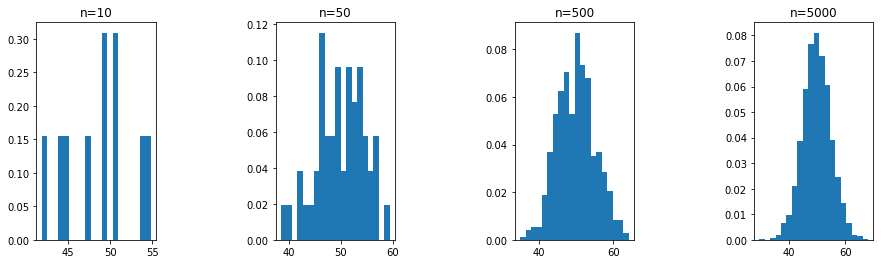

In [113]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.


The Central Limit Theorem (CLT) - given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

The more of observations the more the distribution is looking like normal distribution

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

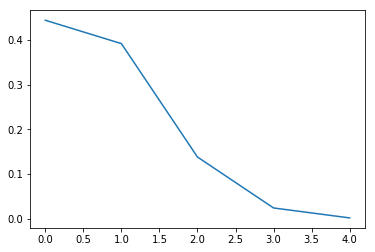

In [28]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

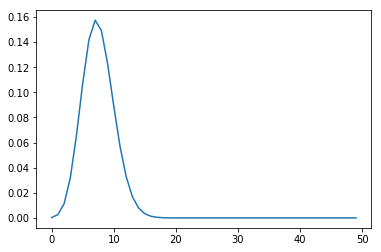

In [29]:
# Your code here
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

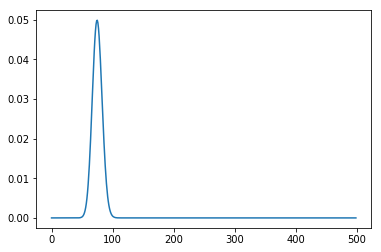

In [30]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

A Poisson Process meets the following criteria (in reality many phenomena modeled as Poisson processes don’t meet these exactly):

Events are independent of each other. The occurrence of one event does not affect the probability another event will occur.
The average rate (events per time period) is constant.
Two events cannot occur at the same time.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [36]:
# Your code here
from scipy.stats import poisson
prob = poisson.pmf(320, 300)
prob

0.011612348610402475

#### What is the probability of getting 60 visits?

In [37]:
# Your code here
prob = poisson.pmf(60, 300)
prob

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

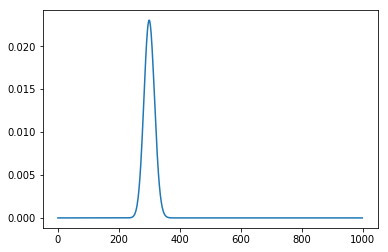

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [40]:
# Your answer here
x = 0.734-0.5 
print ("probability for one delivery", x)



probability for one delivery 0.23399999999999999


#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [ ]:
# Your answer here
x= 0.8119